In [1]:
import torch, torch.nn as nn 
from torch.utils.data import TensorDataset, DataLoader 
from torch.optim.lr_scheduler import StepLR

In [16]:
# define input size, hidden layer size, output size 
D_i, D_k, D_o = 10, 40, 5 

# init device
# Check if MPS is available
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS device.")
else:
    device = torch.device("cpu")
    print("MPS device not available, falling back to CPU.")

# create model with two hidden layers 
model = nn.Sequential(
    nn.Linear(D_i, D_k), 
    nn.ReLU(), 
    nn.Linear(D_k, D_k), 
    nn.ReLU(), 
    nn.Linear(D_k, D_o)
).to(device)

# He initialization of weights 
def weights_init(layer_in):
    if isinstance(layer_in, nn.Linear):
        nn.init.kaiming_normal_(layer_in.weight)
        layer_in.bias.data.fill_(0.0) 
model.apply(weights_init)

# choose least squares loss function 
criterion = nn.MSELoss() 

# construct SGD optimizer and initialize learning rate and momentum 
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9) 

# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# create 100 random data points and store in data loader class 
x = torch.randn(100, D_i) 
y = torch.randn(100, D_o) 
data_loader = DataLoader(TensorDataset(x, y), batch_size=10, shuffle=True)

losses = []

# loop over the dataset 100 times 
for epoch in range(100):
    epoch_loss = 0.0 # loop over batches 
    for i, data in enumerate(data_loader):

        # retrieve inputs and labels for this batch 
        x_batch, y_batch = data 

        # zero the parameter gradients 
        optimizer.zero_grad() 

        # forward pass 
        pred = model(x_batch.to(device)) 
        loss = criterion(pred, y_batch.to(device)) 

        # backward pass 
        loss.backward() 

        # SGD update 
        optimizer.step() 

        # update statistics 
        epoch_loss += loss.item() 

    # print error 
    print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}') 
    losses.append(epoch_loss)

    # tell scheduler to consider updating learning rate 
    scheduler.step()

Using MPS device.
Epoch     0, loss 16.289
Epoch     1, loss 9.088
Epoch     2, loss 8.302
Epoch     3, loss 7.585
Epoch     4, loss 7.172
Epoch     5, loss 6.648
Epoch     6, loss 6.277
Epoch     7, loss 6.262
Epoch     8, loss 5.798
Epoch     9, loss 6.214
Epoch    10, loss 5.153
Epoch    11, loss 4.800
Epoch    12, loss 4.503
Epoch    13, loss 4.183
Epoch    14, loss 3.998
Epoch    15, loss 3.861
Epoch    16, loss 3.869
Epoch    17, loss 3.704
Epoch    18, loss 3.607
Epoch    19, loss 3.497
Epoch    20, loss 3.344
Epoch    21, loss 3.266
Epoch    22, loss 3.196
Epoch    23, loss 3.168
Epoch    24, loss 3.100
Epoch    25, loss 3.053
Epoch    26, loss 3.040
Epoch    27, loss 2.995
Epoch    28, loss 2.950
Epoch    29, loss 2.882
Epoch    30, loss 2.823
Epoch    31, loss 2.796
Epoch    32, loss 2.771
Epoch    33, loss 2.763
Epoch    34, loss 2.738
Epoch    35, loss 2.721
Epoch    36, loss 2.708
Epoch    37, loss 2.686
Epoch    38, loss 2.669
Epoch    39, loss 2.653
Epoch    40, loss 2.6

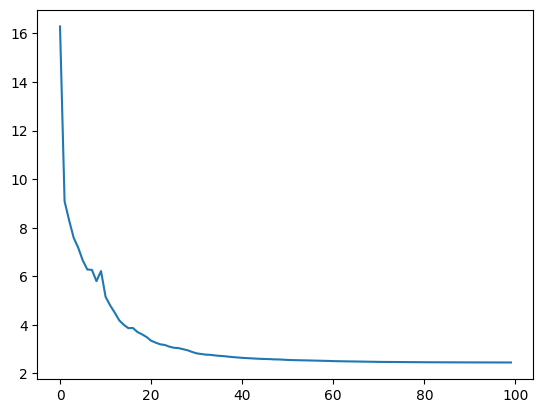

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_ = ax.plot(range(100), losses)

In [21]:
# define input size, hidden layer size, output size 
D_i, D_k, D_o = 10, 40, 5 

# init device
# Check if MPS is available
if torch.backends.mps.is_available():
    device = torch.device("cpu")
    print("Using MPS device.")
else:
    device = torch.device("cpu")
    print("MPS device not available, falling back to CPU.")

# create model with two hidden layers 
model = nn.Sequential(
    nn.Linear(D_i, D_k), 
    nn.ReLU(), 
    nn.Linear(D_k, D_k), 
    nn.ReLU(), 
    nn.Linear(D_k, D_o),
    nn.Sigmoid()
).to(device)

# He initialization of weights 
def weights_init(layer_in):
    if isinstance(layer_in, nn.Linear):
        nn.init.kaiming_normal_(layer_in.weight)
        layer_in.bias.data.fill_(0.0) 
model.apply(weights_init)

# choose least squares loss function 
criterion = nn.BCELoss()

# construct SGD optimizer and initialize learning rate and momentum 
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9) 

# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# create 100 random data points and store in data loader class 
x = torch.randn(100, D_i) 
y = (torch.randn(100, D_o) > 0).to(torch.float32)
data_loader = DataLoader(TensorDataset(x, y), batch_size=10, shuffle=True)

losses = []

# loop over the dataset 100 times 
for epoch in range(300):
    epoch_loss = 0.0 # loop over batches 
    for i, data in enumerate(data_loader):

        # retrieve inputs and labels for this batch 
        x_batch, y_batch = data 

        # zero the parameter gradients 
        optimizer.zero_grad() 

        # forward pass 
        pred = model(x_batch.to(device)) 
        loss = criterion(pred, y_batch.to(device)) 

        # backward pass 
        loss.backward() 

        # SGD update 
        optimizer.step() 

        # update statistics 
        epoch_loss += loss.item() 

    # print error 
    print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}') 
    losses.append(epoch_loss)

    # tell scheduler to consider updating learning rate 
    scheduler.step()

Using MPS device.
Epoch     0, loss 8.697
Epoch     1, loss 6.911
Epoch     2, loss 6.279
Epoch     3, loss 5.776
Epoch     4, loss 5.372
Epoch     5, loss 4.926
Epoch     6, loss 4.609
Epoch     7, loss 4.406
Epoch     8, loss 4.001
Epoch     9, loss 3.711
Epoch    10, loss 3.279
Epoch    11, loss 3.082
Epoch    12, loss 2.925
Epoch    13, loss 2.777
Epoch    14, loss 2.606
Epoch    15, loss 2.445
Epoch    16, loss 2.308
Epoch    17, loss 2.146
Epoch    18, loss 2.031
Epoch    19, loss 1.912
Epoch    20, loss 1.754
Epoch    21, loss 1.681
Epoch    22, loss 1.632
Epoch    23, loss 1.576
Epoch    24, loss 1.516
Epoch    25, loss 1.454
Epoch    26, loss 1.408
Epoch    27, loss 1.379
Epoch    28, loss 1.330
Epoch    29, loss 1.278
Epoch    30, loss 1.220
Epoch    31, loss 1.197
Epoch    32, loss 1.175
Epoch    33, loss 1.152
Epoch    34, loss 1.131
Epoch    35, loss 1.111
Epoch    36, loss 1.091
Epoch    37, loss 1.075
Epoch    38, loss 1.055
Epoch    39, loss 1.035
Epoch    40, loss 1.01

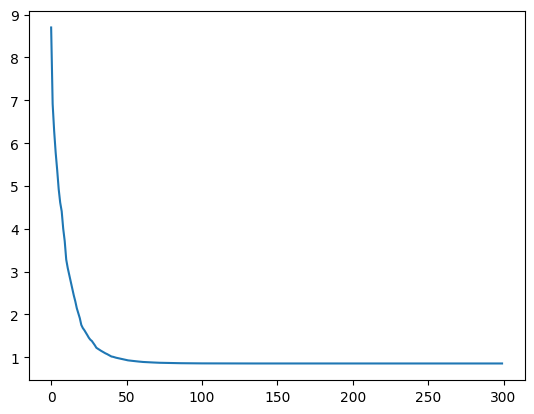

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_ = ax.plot(range(300), losses)